<a href="https://colab.research.google.com/github/dwjang0902/ExampleNew/blob/master/RNN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참조사이트
    1. github.com/hjkim666/tensorflow
    2. www.easy-tensorflow.com/tf-tutorials/recurrent-neural-networks/

In [0]:
# 국방과학연구소/딥러닝의 이해
# www.github/hjkim666/tensorflow 를 참조할 것
#http://www.easy-tensorflow.com/tf-tutorials/recurrent-neural-networks/vanilla-rnn-for-classification

import tensorflow as tf
import numpy as np

tf.reset_default_graph()

# Example-1
'''
hidden_size = 2
cell = tf.contrib.rnn.BasicRNNCell(num_units = hidden_size)

x_data = np.array([[[1.,0.,0.,0.]]], dtype = np.float32)

outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
print(outputs.eval())
'''
'''
# Example-2
h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,1,0]
o = [0,0,0,1]

x_data = np.array([
                  [h,e,l,l,o],
                  [e,o,l,l,l],
                  [l,l,e,e,l]
                  ], dtype = np.float32)
print(x_data.shape)
#print("x_data = ", x_data)

hidden_size = 2

cell = tf.contrib.rnn.BasicRNNCell(num_units = hidden_size)
outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype = tf.float32)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
print(outputs.eval())
print(outputs.eval().shape)
'''
# Example-3

h = [1,0,0,0,0]
i = [0,1,0,0,0]
e = [0,0,1,0,0]
l = [0,0,0,1,0]
o = [0,0,0,0,1]

idx2char =['h','i','e', 'l', 'o']

x_one_hot = [[
              [1,0,0,0,0],
              [0,1,0,0,0],
              [1,0,0,0,0],
              [0,0,1,0,0],
              [0,0,0,1,0],
              [0,0,0,1,0]   
            ]]

x_data = [[0,1,0,2,3,3]]
y_data = [[1,0,2,3,3,4]]

hidden_size =5
input_dim = 5
batch_size = 1
sequence_length = 6
num_classes = 5

X = tf.placeholder(tf.float32, [None, sequence_length, input_dim])
Y = tf.placeholder(tf.int32, [None, sequence_length])

#forward section
cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_size, state_is_tuple = True)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)

# fully connected layer를 사용하는 경우임, 이 에제에서는 사용하지 않는 경우와 유사함...
x_for_fc = tf.reshape(outputs, [-1, hidden_size])
results = tf.contrib.layers.fully_connected(inputs = x_for_fc, num_outputs = num_classes, activation_fn = None)
results = tf.reshape(results,[batch_size, sequence_length, num_classes])

prediction = tf.argmax(outputs, axis = 2)

# Training section
weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits = outputs, targets = Y, weights = weights)
loss = tf.reduce_mean(sequence_loss)

train = tf.train.AdamOptimizer(0.1).minimize(loss)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())

    for i in range(1000) :
        L, _ = sess.run([loss, train], feed_dict = {X:x_one_hot, Y:y_data})
        result = sess.run(prediction, feed_dict = {X:x_one_hot})
        #print(i, "loss", L, "prediction :", result, "true Y:", y_data)
        result_str = [idx2char[c] for c in np.squeeze(result)] # 숫자를 글자로 바꾸고, 디멘젼을 스퀴즈 한다.
        #print(result_str)
        print(i, "\t Predicted str ", ",".join(result_str) ) #스트링으로 바꾼다
        
         

In [0]:
# 국방과학연구소/딥러닝의 이해 : char-rnn(Example-4)   
import tensorflow as tf
import numpy as np

tf.reset_default_graph() # 중요한 부분이다; 이것이 없으면 런타임을 항상 리셋 해 주어야 한다.

tf.set_random_seed(777)


sample = "if you want you"
idx2char = list(set(sample))
char2idx = {c:i for i,c in enumerate(idx2char)}
print(sample, " ->", idx2char)
print(char2idx)

dic_size = len(char2idx)
hidden_size = len(idx2char)
num_classes = len(char2idx)
batch_size = 1
sequence_length = len(sample)-1

sample_idx = [char2idx[c] for c in sample]
print(sample_idx, "length = ", len(sample_idx))

x_data = [sample_idx[:-1]]
y_data = [sample_idx[1:]]
print(x_data,"\n", y_data)

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

x_one_hot = tf.one_hot(X, num_classes)

#forward section
cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_size, state_is_tuple = True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell,x_one_hot, initial_state = initial_state, dtype = tf.float32)


# fully connected layer를 사용하는 경우임, 이 에제에서는 사용하지 않는 경우와 유사함...
x_for_fc = tf.reshape(outputs, [-1, hidden_size])
results = tf.contrib.layers.fully_connected(inputs = x_for_fc, num_outputs = num_classes, activation_fn = None)
results = tf.reshape(results,[batch_size, sequence_length, num_classes])

prediction = tf.argmax(outputs, axis = 2)

# Training section
weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits = outputs, targets = Y, weights = weights)
loss = tf.reduce_mean(sequence_loss)

train = tf.train.AdamOptimizer(0.1).minimize(loss)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())

    for i in range(20) :
        L, _ = sess.run([loss, train], feed_dict = {X:x_data, Y:y_data})
        result = sess.run(prediction, feed_dict = {X:x_data})
        #print(i, "loss", L, "prediction :", result, "true Y:", y_data)
        result_str = [idx2char[c] for c in np.squeeze(result)] # 숫자를 글자로 바꾸고, 디멘젼을 스퀴즈 한다.
        #print(result_str)
        print(i, "\t Predicted str ", "".join(result_str) ) #스트링으로 바꾼다
       

In [0]:
# 국방과학연구소/딥러닝의 이해 : char-rnn 예제 2 (Example-5)   
import tensorflow as tf
import numpy as np

tf.reset_default_graph() # 중요한 부분이다; 이것이 없으면 런타임을 항상 리셋 해 주어야 한다.

tf.set_random_seed(777)

sentence = ("뉴스 기반의 지식네트워크를 지향하는"
            "조선닷컴은 1995년 국내 최초로 온라인 뉴스서비스를 실시하여,"
            "가장 빠른 국내 최고의 온라인 뉴스를 제공합니다.")

char_set = list(set(sentence)) 
char_dic = {c:i for i,c in enumerate(char_set)} # char dictionary
print(sentence, "\n ->", char_set)
print(char_set)

data_dim = len(char_set); print("data_dim = ", data_dim)
num_classes = len(char_set); print("num_classes = ", num_classes)
hidden_size = len(char_set); print("hidden_size = ", hidden_size)
seq_length = 10

#batch_size = 1

dataX = []
dataY = []

for i in range(0, len(sentence)-seq_length) :
    x_str = sentence[i:i+seq_length]
    y_str = sentence[i+1:i+seq_length+1]
#    print(i, x_str, '->', y_str)
    
    x = [char_dic[c] for c in x_str] 
    y = [char_dic[c] for c in y_str] 
    dataX.append(x)
    dataY.append(y)

#    print(dataX[i], '->', dataY[i])
    
batch_size = len(dataX); print(batch_size)    

X = tf.placeholder(tf.int32, [None, seq_length])
Y = tf.placeholder(tf.int32, [None, seq_length])
Batch_Size = tf.placeholder(tf.int32,[1])

x_one_hot = tf.one_hot(X, num_classes)

#forward section
cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_size, state_is_tuple = True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell,x_one_hot, initial_state = initial_state, dtype = tf.float32)

x_for_softmax = tf.reshape(outputs, [-1,hidden_size])
softmax_w = tf.get_variable("softmax_w",[hidden_size,num_classes])
softmax_b = tf.get_variable("softmax_b",[num_classes])
outpputs = tf.matmul(x_for_softmax, softmax_w) + softmax_b

outputs = tf.reshape(outputs,[batch_size, seq_length, num_classes])

weights = tf.ones([batch_size, seq_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits = outputs, targets = Y, weights = weights)
mean_loss = tf.reduce_mean(sequence_loss)

train_op = tf.train.AdamOptimizer(0.01).minimize(mean_loss)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(1000) :
    _, L, results = sess.run(
            [train_op, mean_loss, outputs], feed_dict = {X:dataX, Y:dataY})
    for j, result in enumerate(results) :
        index = np.argmax(result, axis = 1)
#        print(i,j, ''.join(char_set[t] for t in index), L)


results = sess.run(outputs, feed_dict={X: dataX})
for j, result in enumerate(results) :
    index = np.argmax(result, axis = 1)
    if j is 0 :
        print( ''.join(char_set[t] for t in index), end='')
    else :
        print(char_set[index[-1]], end = '')
        
        

# 입력으로 한개의 시퀀스만을 사용할 수 있도록 고쳐보자 ??????
# 어떻게 고쳐야 하는지 모르겠당

뉴스 기반의 지식네트워크를 지향하는조선닷컴은 1995년 국내 최초로 온라인 뉴스서비스를 실시하여,가장 빠른 국내 최고의 온라인 뉴스를 제공합니다. 
 -> ['로', '고', '합', ' ', '온', '크', '여', ',', '하', '장', '빠', '.', '인', '9', '국', '실', '다', '최', '1', '조', '제', '뉴', '비', '라', '의', '지', '선', '트', '내', '서', '시', '른', '향', '네', '5', '스', '닷', '년', '는', '컴', '식', '초', '를', '은', '공', '반', '니', '기', '워', '가']
['로', '고', '합', ' ', '온', '크', '여', ',', '하', '장', '빠', '.', '인', '9', '국', '실', '다', '최', '1', '조', '제', '뉴', '비', '라', '의', '지', '선', '트', '내', '서', '시', '른', '향', '네', '5', '스', '닷', '년', '는', '컴', '식', '초', '를', '은', '공', '반', '니', '기', '워', '가']
data_dim =  50
num_classes =  50
hidden_size =  50
71


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


스서기반의 지식네트워크를 지향하는조선닷컴은 1995년 국내 최초로 온라인 뉴스서비스를 실시하여,가장 빠른 국내 최고의 온라인 뉴스를 제공합니다니

In [0]:
# 국방과학연구소/딥러닝의 이해 : char-rnn 예제 2 (Example-5)  New ; Batch-size와 관계없이 만들어진 것임 .....
# 2019.4.24

import tensorflow as tf
import numpy as np

tf.reset_default_graph() # 중요한 부분이다; 이것이 없으면 런타임을 항상 리셋 해 주어야 한다.

tf.set_random_seed(777)

sentence = ("뉴스 기반의 지식네트워크를 지향하는"
            "조선닷컴은 1995년 국내 최초로 온라인 뉴스서비스를 실시하여,"
            "가장 빠른 국내 최고의 온라인 뉴스를 제공합니다.")

char_set = list(set(sentence)) 
char_dic = {c:i for i,c in enumerate(char_set)} # char dictionary
print(sentence, "\n ->", char_set)
print(char_set)

data_dim = len(char_set); print("data_dim = ", data_dim)
num_classes = len(char_set); print("num_classes = ", num_classes)
hidden_size = len(char_set); print("hidden_size = ", hidden_size)
seq_length = 10

#batch_size = 1

dataX = []
dataY = []

for i in range(0, len(sentence)-seq_length) :
    x_str = sentence[i:i+seq_length]
    y_str = sentence[i+1:i+seq_length+1]
#    print(i, x_str, '->', y_str)
    
    x = [char_dic[c] for c in x_str] 
    y = [char_dic[c] for c in y_str] 
    dataX.append(x)
    dataY.append(y)

#    print(dataX[i], '->', dataY[i])
    
batch_size = len(dataX); print(batch_size)    

X = tf.placeholder(tf.int32, [None, seq_length])
Y = tf.placeholder(tf.int32, [None, seq_length])
Batch_Size = tf.placeholder(tf.int32,[1])

x_one_hot = tf.one_hot(X, num_classes)

#forward section
cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_size, state_is_tuple = True)
#initial_state = cell.zero_state(batch_size , tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell,x_one_hot, dtype = tf.float32)

'''
x_for_softmax = tf.reshape(outputs, [-1,hidden_size])
softmax_w = tf.get_variable("softmax_w",[hidden_size,num_classes])
softmax_b = tf.get_variable("softmax_b",[num_classes])
outpputs = tf.matmul(x_for_softmax, softmax_w) + softmax_b


outputs = tf.reshape(outputs,[batch_size, seq_length, num_classes])

# weights = tf.ones([batch_size , seq_length])
'''

#sequence_loss = tf.contrib.seq2seq.sequence_loss(logits = outputs, targets = Y, weights = weights)
sequence_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=outputs) # 새롭게 사용한 것임; batch_size를 사용하지 않기 위해서 ...
mean_loss = tf.reduce_mean(sequence_loss)

train_op = tf.train.AdamOptimizer(0.001).minimize(mean_loss)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(10000) :
    _, L, results = sess.run(
            [train_op, mean_loss, outputs], feed_dict = {X:dataX, Y:dataY})
    for j, result in enumerate(results) :
        index = np.argmax(result, axis = 1)
#        print(i,j, ''.join(char_set[t] for t in index), L)


results = sess.run(outputs, feed_dict={X:dataX[0:30]})
for j, result in enumerate(results) :
    index = np.argmax(result, axis = 1)
    if j is 0 :
        print( ''.join(char_set[t] for t in index), end='')
    else :
        print(char_set[index[-1]], end = '')
        
                

뉴스 기반의 지식네트워크를 지향하는조선닷컴은 1995년 국내 최초로 온라인 뉴스서비스를 실시하여,가장 빠른 국내 최고의 온라인 뉴스를 제공합니다. 
 -> ['로', '고', '합', ' ', '온', '크', '여', ',', '하', '장', '빠', '.', '인', '9', '국', '실', '다', '최', '1', '조', '제', '뉴', '비', '라', '의', '지', '선', '트', '내', '서', '시', '른', '향', '네', '5', '스', '닷', '년', '는', '컴', '식', '초', '를', '은', '공', '반', '니', '기', '워', '가']
['로', '고', '합', ' ', '온', '크', '여', ',', '하', '장', '빠', '.', '인', '9', '국', '실', '다', '최', '1', '조', '제', '뉴', '비', '라', '의', '지', '선', '트', '내', '서', '시', '른', '향', '네', '5', '스', '닷', '년', '는', '컴', '식', '초', '를', '은', '공', '반', '니', '기', '워', '가']
data_dim =  50
num_classes =  50
hidden_size =  50
71


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


스서기반의 지식네트워크를 지향하는조선닷컴은 1995년 국내 최초로 온라

In [0]:
# 머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀어봅니다.
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
tf.reset_default_graph() # 중요한 부분이다; 이것이 없으면 런타임을 항상 리셋 해 주어야 한다.


#########
# 옵션 설정
######
learning_rate = 0.001
total_epoch = 30
batch_size = 128

# RNN 은 순서가 있는 자료를 다루므로,
# 한 번에 입력받는 갯수와, 총 몇 단계로 이루어져있는 데이터를 받을지를 설정해야합니다.
# 이를 위해 가로 픽셀수를 n_input 으로, 세로 픽셀수를 입력 단계인 n_step 으로 설정하였습니다.
n_input = 28
n_step = 28
n_sequence = n_step
n_hidden = 128
n_class = 10

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, n_step, n_input])

Y = tf.placeholder(tf.float32, [None, n_class])

W = tf.Variable(tf.random_normal([n_hidden, n_class]))
b = tf.Variable(tf.random_normal([n_class]))

# RNN 에 학습에 사용할 셀을 생성합니다
# 다음 함수들을 사용하면 다른 구조의 셀로 간단하게 변경할 수 있습니다
# BasicRNNCell,BasicLSTMCell,GRUCell
cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)

# RNN 신경망을 생성합니다
# 원래는 다음과 같은 과정을 거쳐야 하지만
# states = tf.zeros(batch_size)
# for i in range(n_step):
#     outputs, states = cell(X[[:, i]], states)
# ...
# 다음처럼 tf.nn.dynamic_rnn 함수를 사용하면
# CNN 의 tf.nn.conv2d 함수처럼 간단하게 RNN 신경망을 만들어줍니다.
# 겁나 매직!!
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
# RNN의 출력이다.

# 결과를 Y의 다음 형식과 바꿔야 하기 때문에
# Y : [batch_size, n_class]
# outputs 의 형태를 이에 맞춰 변경해야합니다.
# outputs : [batch_size, n_step, n_hidden]
#        -> [n_step, batch_size, n_hidden]
#        -> [batch_size, n_hidden]
#outputs = tf.transpose(outputs, [1, 0, 2])
outputs = outputs[:,-1,:] # 시퀀스에서 하나를 선택한 것이다.
#outputs = outputs[-2] # n_step는 시퀀스, 즉 cell의 수이고 안에 숫자는 몇 번째 셀의 출력을 취할 것인가를 정하는 것으로 보면 된다 !!!!!!!!
model = tf.matmul(outputs, W) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(total_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # X 데이터를 RNN 입력 데이터에 맞게 [batch_size, n_step, n_input] 형태로 변환합니다.
        batch_xs = batch_xs.reshape((batch_size, n_step, n_input))

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

test_batch_size = len(mnist.test.images)
test_xs = mnist.test.images.reshape(test_batch_size, n_step, n_input)
test_ys = mnist.test.labels

print('정확도:', sess.run(accuracy,
                       feed_dict={X: test_xs, Y: test_ys}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.540
Epoch: 0002 Avg. cost = 0.237
Epoch: 0003 Avg. cost = 0.182
Epoch: 0004 Avg. cost = 0.151
Epoch: 0005 Avg. cost = 0.130
Epoch: 0006 Avg. cost = 0.119
Epoch: 0007 Avg. cost = 0.120
Epoch: 0008 Avg. cost = 0.107
Epoch: 0009 Avg. cost = 0.097
Epoch: 0010 Avg. cost = 0.097
Epoch: 0011 Avg. cost = 0.089
Epoch: 0012 Avg. cost = 0.089
Epoch: 0013 Avg. cost = 0.085
Epoch: 0014 Avg. cost = 0.091
Epoch: 0015 Avg. cost = 0.082
Epoch: 0016 Avg. cost = 0.082
Epoch: 0017 Avg. cost = 0.077
Epoch: 0018 Avg. cost = 0.074
Epoch: 0019 Avg. cost = 0.075
Epoch: 0020 Avg. cost = 0.076
Epoch: 0021 Avg. cost = 0.067
Epoch: 0022 Avg. cost = 0.069
Epoch: 0023 Avg. cost = 0.068
Epoch: 0024 Avg. cost = 0.062
Epoch: 0025 Avg. cost = 0.060
Epoch: 0026 Avg. cost = 0.065
Epoch: 0027 Avg. c

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
50000 10000 10000


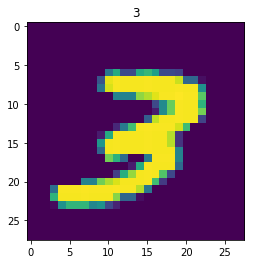

In [0]:
# MNIST 데이터 읽기 및 Ploting

import tensorflow as tf
import matplotlib.pylab as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph() # 중요한 부분이다; 이것이 없으면 런타임을 항상 리셋 해 주어야 한다.


# MNIST DATA READING
mnist_images = input_data.read_data_sets("./mnist/data/", one_hot=False)

train_images,train_labels = mnist_images.train.next_batch(50000)
valid_images,valid_labels = mnist_images.train.next_batch(10000)
test_images, test_labels = mnist_images.test.next_batch(10000)

n = 5001
fig  =test_images[n].reshape([28,28])
plt.imshow(fig)
plt.title(test_labels[n])

print(len(train_images),len(valid_images),len(test_images) )






Text(0.5, 1.0, '5')

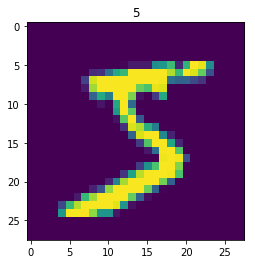

In [0]:
# MNIST 데이터 읽기 및 Ploting from Keras

import tensorflow as tf
import matplotlib.pylab as plt
#from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph() # 중요한 부분이다; 이것이 없으면 런타임을 항상 리셋 해 주어야 한다.

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 #normalization(0~1)

plt.imshow(x_train[0].reshape(28,28))
plt.title(y_train[0])